In [1]:
import numpy as np
from numba import njit, jit
import matplotlib.pyplot as plt

Question 1

a

In [2]:
dydt = lambda y, t: -3 * y + np.sin(t)
dt = np.arange(2, 9)
y0 = np.pi / np.sqrt(2)
t = np.arange(0, 6)
dt = 2**dt
dt = 1/dt
ytrue = lambda t: np.pi * np.e ** (3 * (np.cos(t) - 1)) / np.sqrt(2)
# val_dict = {}
# for i in dt: 
#     res = [y0]
#     for j in t:
#         res.append(res[-1] + i * dydt(res[-1], j))
#     val_dict[i] = res
# print(val_dict) 

In [3]:
@jit(parallel=True)
def forward_euler(dydt, y0, t, dt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + dydt(y[i-1], t[i-1]) * dt
    return y

/tmp/ipykernel_4154/3280254762.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "forward_euler" failed type inference due to: non-precise type pyobject
During: typing of argument at /tmp/ipykernel_4154/3280254762.py (3)

File "../../../tmp/ipykernel_4154/3280254762.py", line 3:
<source missing, REPL/exec in use?>

  @jit(parallel=True)
/tmp/ipykernel_4154/3280254762.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "forward_euler" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../../../tmp/ipykernel_4154/3280254762.py", line 5:
<source missing, REPL/exec in use?>

  @jit(parallel=True)
/opt/conda/lib/python3.10/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "forward_euler" was compiled in object mode without forceobj=True, but has lifted loops.

File "../../../tmp/ipykernel_4154/32

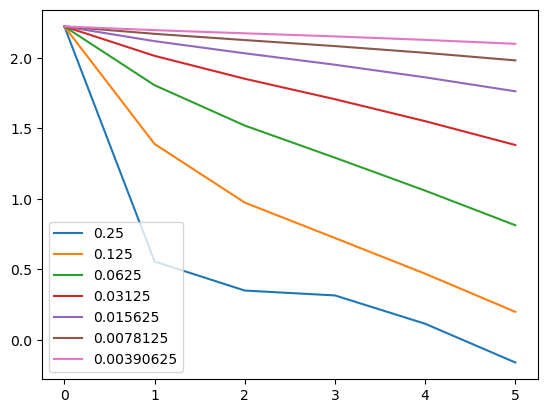

In [4]:
#run forward euler for each dt and plot the results 
for i in dt:
    res = forward_euler(dydt, y0, t, i)
    plt.plot(t, res, label = i)
plt.legend()
plt.show()


b

In [5]:
dydt = lambda y, t: -3 * y + np.sin(t)
dt = np.arange(2, 9)
y0 = np.pi / np.sqrt(2)
t = np.arange(0, 6)
dt = 2**dt
dt = 1/dt
val_dict = {}
for i in dt: 
    res = [y0]
    for j in t:
        res.append(res[-1] + j/2 * (dydt(res[-1], t) + dydt(res[-1] + j * dydt(res[-1], t), t + j)))
    val_dict[i] = res
print(val_dict) 


{0.25: [2.221441469079183, array([2.22144147, 2.22144147, 2.22144147, 2.22144147, 2.22144147,
       2.22144147]), array([5.97433917, 5.1667814 , 4.71486625, 5.03408242, 5.83094403,
       6.3728202 ]), array([78.57570657, 63.1019233 , 55.98997162, 63.77854711, 79.30686938,
       88.29827055]), array([2553.92214364, 2039.57965172, 1807.32412209, 2070.6902176 ,
       2587.5403646 , 2882.68492152]), array([155787.73715702, 124393.92854473, 110226.20807329, 126310.31260635,
       157858.59061185, 175865.70078389]), array([15345089.71265556, 12252771.81163312, 10857251.31227587,
       12441563.32592036, 15549098.69365102, 17322803.72950989])], 0.125: [2.221441469079183, array([2.22144147, 2.22144147, 2.22144147, 2.22144147, 2.22144147,
       2.22144147]), array([5.97433917, 5.1667814 , 4.71486625, 5.03408242, 5.83094403,
       6.3728202 ]), array([78.57570657, 63.1019233 , 55.98997162, 63.77854711, 79.30686938,
       88.29827055]), array([2553.92214364, 2039.57965172, 1807.32412209,

c